In [1]:
%matplotlib inline

In [2]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#read file
file1 = 'song_data.csv'
file2 = 'song_info.csv'

df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)

In [4]:
#combine data from 2 files
song_merged = pd.merge(df1,df2,how="inner",left_index=True, right_index=True)

In [5]:
#check for song_name values
#song_merged.iloc[7018]
#song_sorted = song_merged.sort_values(by=["song_name_x","artist_name", "album_names"], ascending=True)
#song_sorted

In [6]:
#change column name  => will not be necessary, it will be deleted after cleaning data
#song_merged = song_merged.rename(columns={"song_name_x":"song_name"})
#song_merged

In [7]:
#clean data
#delete duplicated song_name ana all column's data except album_name

#delete unnecessary columns
#del song_merged["song_name_y"]
#df.drop('a', axis=1, inplace=True) on Table
song_deleted = song_merged.drop(columns=["playlist", "song_name_y"])

#change column name
song_deleted.columns = song_deleted.columns.str.replace("song_name_x","song_name")
#18835 song_deleted.count()

#delete duplicate
#song_deleted.drop_duplicates(subset ="First Name",keep = False, inplace = True) 
#song_deleted.drop_duplicates(keep = False, inplace = True) 
song_deleted.drop_duplicates(inplace = True) 
#song_deleted.count()

#sort by popularity
song_data = song_deleted.sort_values("song_popularity")

In [8]:
#check sorted data : 14927 rows x 17 columns with song name
#song_data.head()

In [9]:
#clean unnecessary columns 
song_data = song_data.drop(columns=["song_name", "artist_name", "album_names"])
#song_data.count()  # 14927 x14
song_data.head()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
4014,0,224306,0.026100,0.538,0.956,0.000147,9,0.2790,-4.022,1,0.1230,150.028,4,0.720
1078,0,199087,0.105000,0.632,0.646,0.000000,2,0.0454,-7.200,1,0.0519,137.933,4,0.777
17215,0,245173,0.036100,0.765,0.646,0.000001,1,0.2820,-7.101,1,0.3390,163.908,4,0.667
18549,0,292373,0.061600,0.580,0.353,0.000043,0,0.1280,-9.295,1,0.0265,141.987,4,0.242
8421,0,178693,0.000193,0.546,0.815,0.000017,9,0.0461,-6.621,1,0.0513,93.512,4,0.728


In [10]:
#check song_popularity for x_axis value  : 0 to 100, increased on 1
#ss = song_data["song_popularity"].unique()
#ss.sort()
#ss

In [11]:
# study about song_popularity freq
# 100 = max value of song_popularity
max_value = song_data["song_popularity"].max()
min_value = song_data["song_popularity"].min()
len_value = len(song_data["song_popularity"].unique())

freq = song_data["song_popularity"].value_counts()
#freq.dtypes int64

#create table
s = song_data["song_popularity"].value_counts() 
song_pop = pd.DataFrame({'popularity':s.index, 'freq':s.values})
song_pop = song_pop.sort_values("popularity")
#song_pop

In [12]:
#graph popularity freq
#pop
##x_axis = np.arange(0, len_value, 20)
##y_axis = song_pop["freq"]
##plt.plot(x_axis, y_axis)
##plt.show()
#song_pop.plot(kind='scatter',x='popularity',y='freq',color='red')
#plt.show()

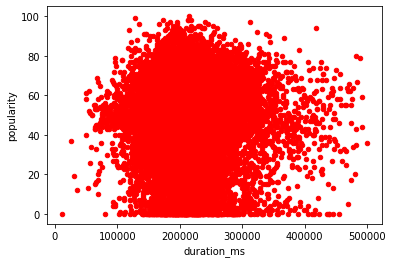

In [13]:
# study about song_popularity & duration
# 100 = max value of song_popularity
dura_max_value = song_data["song_duration_ms"].max() #1799346 29.99min  , 30min = 1,800,000
dura_min_value = song_data["song_duration_ms"].min() #12000   0.2min   , 1min = 60,000
dura_len_value = len(song_data["song_duration_ms"].unique())  #11771 

song_dura = song_data[["song_duration_ms", "song_popularity"]]
song_dura = song_dura.rename(columns={"song_duration_ms":"duration_ms","song_popularity":"popularity" })
#song_dura
#song_dura.plot(kind='scatter',x='duration_ms',y='popularity',color='red')
#plt.show()

#cut data
song_dura = song_dura[song_dura.duration_ms < 500000]
song_dura.plot(kind='scatter',x='duration_ms',y='popularity',color='red')
plt.show()

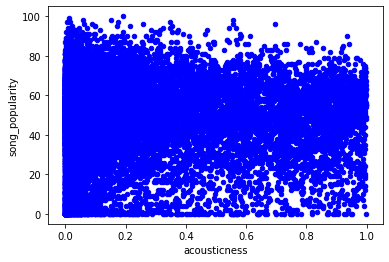

In [14]:
song_data.plot(kind='scatter',x='acousticness',y='song_popularity',color='blue')
plt.show()

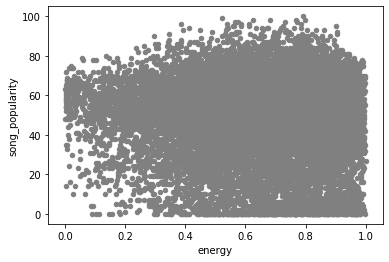

In [15]:
song_data.plot(kind='scatter',x='energy',y='song_popularity',color='grey')
plt.show()

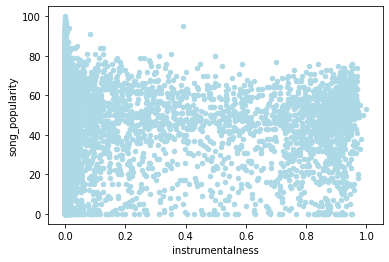

In [16]:
song_data.plot(kind='scatter',x='instrumentalness',y='song_popularity',color='lightblue')
plt.show()

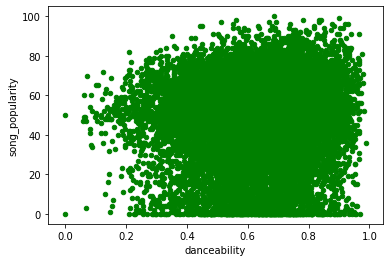

In [17]:
song_data.plot(kind='scatter',x='danceability',y='song_popularity',color='green')
plt.show()

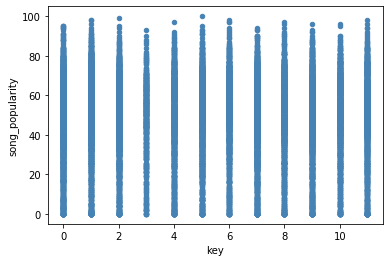

In [18]:
song_data.plot(kind='scatter',x='key',y='song_popularity',color='steelblue')
plt.show()

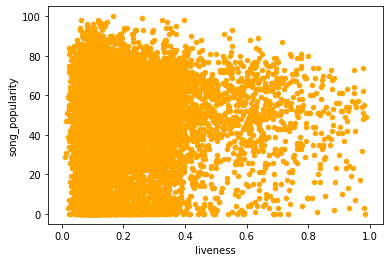

In [25]:
song_data.plot(kind='scatter',x='liveness',y='song_popularity',color='orange')
plt.show()

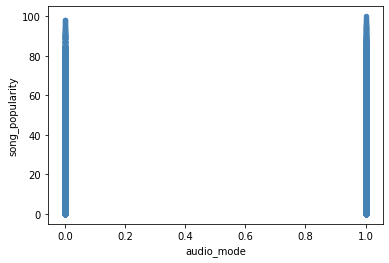

In [20]:
song_data.plot(kind='scatter',x='audio_mode',y='song_popularity',color='steelblue')
plt.show()

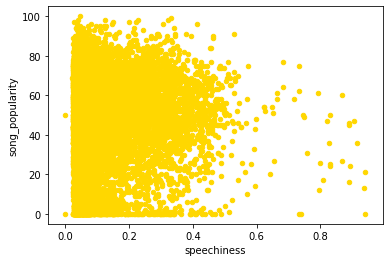

In [21]:
song_data.plot(kind='scatter',x='speechiness',y='song_popularity',color='gold')
plt.show()

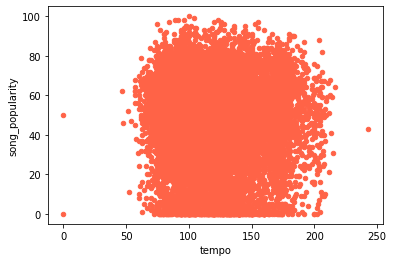

In [22]:
song_data.plot(kind='scatter',x='tempo',y='song_popularity',color='tomato')
plt.show()